# __FINAL PROJECT PHASE II__

# __RESEARCH QUESTION:__
Can we predict EV adoption rates within different counties in Washington based on factors like population density, average income, and access to public charging infrastructure?

### Importing:

In [1]:
# imports and settings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import duckdb
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Data Description:
Source: https://www.kaggle.com/datasets/sahirmaharajj/electric-vehicle-population

The dataset provides detailed information on Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) registered with the Washington State Department of Licensing (DOL). It includes key details such as the vehicle type (whether the vehicle is a BEV, which runs fully on electric power, or a PHEV, which combines battery-powered electric motors with fuel-based engines). The dataset also provides the make and model of each vehicle, along with the model year to indicate the year of manufacture.

Additionally, the dataset specifies the county where each vehicle is registered within Washington State. A significant aspect of the data is whether the vehicle qualifies for Clean Alternative Fuel Vehicle (CAFV) eligibility, which determines if the vehicle meets the requirements for sales and use tax exemptions, based on the vehicle's fuel type and electric-only range as per Washington laws RCW 82.08.809 and RCW 82.12.809. For PHEVs, the dataset may also include the electric-only range, showing how far the vehicle can travel solely on battery power before switching to an internal combustion engine.



In [2]:
ev_df = pd.read_csv('Electric_Vehicle_Population_Data.csv', encoding='ISO-8859-1')
print(ev_df.shape)
ev_df.head()

(177866, 17)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
#To first get an idea of the summary of the data
ev_df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [4]:
ev_df = ev_df.dropna(subset=['County', 'Model Year', 'Make', 'Electric Vehicle Type', 'Electric Range'])
ev_df = ev_df[ev_df['Electric Range'] > 0]
ev_df['Model Year'] = ev_df['Model Year'].astype(int)

In [5]:
county_ev_counts = duckdb.query("""
    SELECT County, COUNT(*) AS "EV Count"
    FROM ev_df
    GROUP BY County
""").to_df()

merged_ev_df = duckdb.query("""
    SELECT a.*, b."EV Count"
    FROM ev_df AS a
    LEFT JOIN county_ev_counts AS b ON a.County = b.County
""").to_df()

/var/folders/fk/xb4d2x6d3vj5d7ydvsh9gcqc0000gn/T/ipykernel_79791/3196554523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=county_ev_counts.sort_values(by='EV Count', ascending=False), x='County', y='EV Count', palette='viridis')


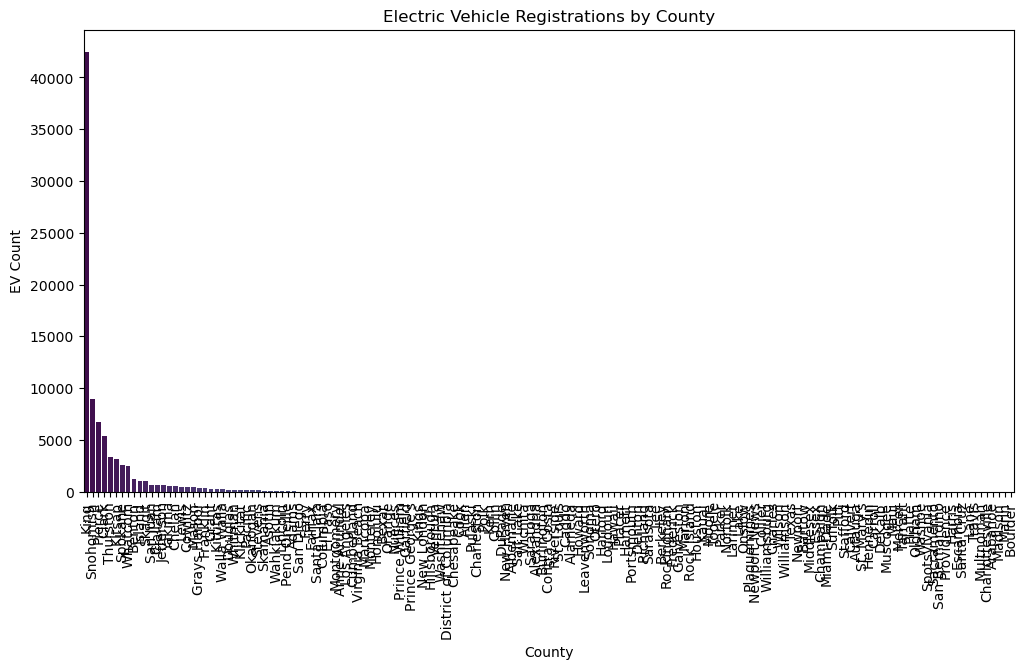

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(data=county_ev_counts.sort_values(by='EV Count', ascending=False), x='County', y='EV Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Electric Vehicle Registrations by County')
plt.show()

In [8]:
X = merged_ev_df[['Model Year', 'Electric Range']] 
y = merged_ev_df['EV Count'] 
reg_model = LinearRegression()
reg_model.fit(X, y)
y_pred = reg_model.predict(X)

slope = reg_model.coef_
intercept = reg_model.intercept_

print("Slope", slope)
print("Intercept", intercept)

Slope [372.95955847  13.87070577]
Intercept -731210.4039241438
